In [93]:
import pandas as pd
import numpy as np
import nltk
import datetime
import datetime

df_review = pd.read_csv('/Users/jiahehou/Downloads/detail_review.csv', encoding = "ISO-8859-1")
df_review['date'] = df_review['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
df_review['pickup_year'] = df_review['date'].apply(lambda x:int(datetime.datetime.strftime(x,'%Y')))
df_review[df_review['pickup_year'] == 2018].reset_index().sample(10000)

,index,listing_id,id,date,reviewer_id,reviewer_name,comments,pickup_year
297124,980794,21711978,230573951,2018-01-28,162556010,Carlos,Great place! The location is a great staging p...,2018
184494,780819,15990572,314127110,2018-08-26,65689170,Holger,The host canceled this reservation 491 days be...,2018
385724,1071628,26333121,311580592,2018-08-21,145065169,Arturo,No el mejor ni muy bueno pero si decente y sol...,2018
194642,804722,16543637,246945845,2018-03-26,71399848,Tre',Thanks for the stay. It was a nice stay that a...,2018
79846,433894,6438456,293607408,2018-07-20,176763691,Veronica,I recommend you all to stay with Walter. Every...,2018
129046,619153,11675715,264741700,2018-05-14,27843870,Heather,Josue has a great place in a great location. ...,2018
360624,1046528,24438564,297241622,2018-07-27,5157655,Theo,Oscar has created a little oasis in Queens. So...,2018
149277,683479,13564134,318255103,2018-09-03,104964207,Vivian,Frankâs place was very spacious with air con...,2018
4789,36284,94477,295450985,2018-07-23,6318440,Ignacio,"Nos alojamos mi seÃ±ora, mis 3 hijos (de los c...",2018
239575,896198,19385941,270176820,2018-05-28,185847456,Kevin,Room is very nice and spacious. Place is very ...,2018


In [94]:
df_listing = pd.read_csv('/Users/jiahehou/Downloads/listings.csv', encoding = "ISO-8859-1")

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
# narrowing location
df_listing = df_listing[df_listing['neighbourhood_group_cleansed']=='Manhattan']

In [96]:
# define district
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

In [97]:
df_listing['district'] = df_listing['neighbourhood_cleansed'].map(lambda x:district(x))

In [98]:
df_listing.rename(columns={'id':'listing_id'}, inplace=True)

In [99]:
# merge two dataframe along listing_id
result = pd.merge(df_listing, df_review, on = 'listing_id')
result = result.dropna(subset=['comments'])

In [8]:
nrc = "/Users/jiahehou/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count = 0
emotion_dict = dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count += 1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]

In [9]:
def get_nrc_data():
    nrc = "/Users/jiahehou/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count = 0
    emotion_dict =dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count += 1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [ ]:
result_list = []

In [31]:
# sentiment for upper Manhattan
upper_M = str()
for comment in result.loc[(result['district'] == 'Upper Manhattan'), 'comments'].iloc[:1000]:
    upper_M += str(comment)
def upper_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_M.split())
    return emotion_count
um = upper_m()
result_list.append(um)

In [32]:
# sentiment for Upper West Manhattan
upper_W = str()
for comment in result.loc[(result['district'] == 'Upper West Manhattan'), 'comments'].iloc[:1000]:
    upper_W += str(comment)
def upper_w():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper West Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_W.split())
    return emotion_count
uw = upper_w()
result_list.append(uw)

In [33]:
# sentiment for Upper East Manhattan
upper_E = str()
for comment in result.loc[(result['district'] == 'Upper East Manhattan'), 'comments'].iloc[:1000]:
    upper_E += str(comment)
def upper_e():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper East Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_E.split())
    return emotion_count
ue = upper_e()
result_list.append(ue)

In [35]:
# sentiment for Mid West Manhattan
mid_W = str()
for comment in result.loc[(result['district'] == 'Mid West Manhattan'), 'comments'].iloc[:1000]:
    mid_W += str(comment)
def mid_w():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid West Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_W.split())
    return emotion_count
mw = mid_w()
result_list.append(mw)

In [36]:
# sentiment for Mid Manhattan
mid_M = str()
for comment in result.loc[(result['district'] == 'Mid Manhattan'), 'comments'].iloc[:1000]:
    mid_M += str(comment)
    
def mid_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_M.split())
    return emotion_count
mm = mid_m()
result_list.append(mm)

In [37]:
# sentiment for Mid East Manhattan
mid_E = str()
for comment in result.loc[(result['district'] == 'Mid East Manhattan'), 'comments'].iloc[:1000]:
    mid_E += str(comment)
    
def mid_e():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid East Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_E.split())
    return emotion_count
me = mid_e()
result_list.append(me)

In [38]:
# sentiment for Lower Manhattan
lower_M = str()
for comment in result.loc[(result['district'] == 'Lower Manhattan'), 'comments'].iloc[:1000]:
    lower_M += str(comment)
    
def lower_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Lower Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(lower_M.split())
    return emotion_count
lm = lower_m()
result_list.append(lm)

In [49]:
result_list = result_list[1:]

In [90]:
# construct dataframe for sentiment analysis above
combined_dict = {}
for key in result_list[0].keys():
    combined_dict[key] = list(item[key] for item in result_list)
df_sentiment = pd.DataFrame(combined_dict, columns = ['trust', 'sadness', 'fear', 'positive', 'negative',
                                                  'surprise', 'anger', 'joy', 'disgust', 'anticipation'])
df_sentiment['district'] = ['Upper West Manhattan', 'Upper Manhattan', 'Upper East Manhattan',
                         'Mid West Manhattan', 'Mid Manhattan', 'Mid East Manhattan', 'Lower Manhattan']
df_sentiment.set_index('district', inplace = True)
df_sentiment


,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation
district,,,,,,,,,,
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145


In [88]:
df_sentiment['highest_sentiment'] = df_sentiment.idxmax(axis=1)

In [91]:
df_sentiment['lowest_sentiment'] = df_sentiment.idxmin(axis=1)

In [92]:
df_sentiment

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation,lowest_sentiment
district,,,,,,,,,,,
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232,disgust
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305,disgust
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599,disgust
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743,disgust
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298,disgust
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965,disgust
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145,disgust


In [53]:
joy_first = df_sentiment.sort_values(['joy'], ascending=False)
joy_first

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation
district,,,,,,,,,,
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965


In [66]:
name_list = []
for name in df_listing['host_name']:
    name_list.append(str(name))

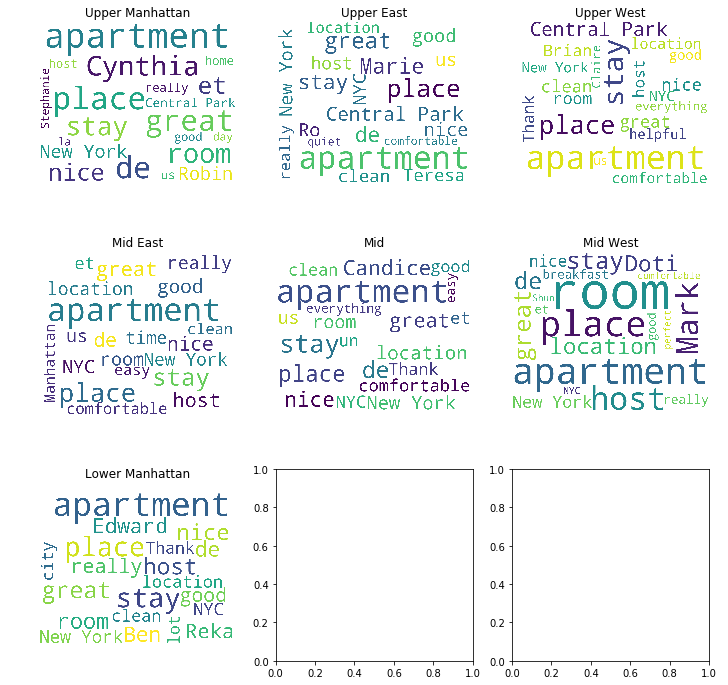

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

def remove_names(text_string,name_list):
    for word in name_list:
        text_string = text_string.replace(word,' ')
    return text_string

# text_string = remove_names(upper_M)
# text_string = remove_words(upper_M)
# text_string = remove_short_words(upper_M)

# wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()


texts = []
texts.append(upper_M)
texts.append(upper_E)
texts.append(upper_W)
texts.append(mid_E)
texts.append(mid_M)
texts.append(mid_W)
texts.append(lower_M)

COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

title_list = ['Upper Manhattan', 'Upper East', 'Upper West', 'Mid East', 'Mid', 'Mid West', 'Lower Manhattan']
for i in range(0,len(texts)):
    text_string = remove_words(texts[i])
    text_string = remove_short_words(text_string)
    ax = axes[i//3, i%3] 
    ax.set_title(title_list[i])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()